In [25]:
import pandas as pd
from math import pi
import matplotlib.pyplot as plt

df_results_finetuned = pd.read_csv("results/Information-Retrieval_evaluation_finetuned-paraphrase-multilingual-MiniLM-L12-v2_results.csv")
df_results_finetuned = df_results_finetuned.drop(columns=["epoch", "steps"])

df_results_not_finetuned = pd.read_csv("results/Information-Retrieval_evaluation_paraphrase-multilingual-MiniLM-L12-v2_results.csv")
df_results_not_finetuned = df_results_not_finetuned.drop(columns=["epoch", "steps"])

metrics = ['cosine-Accuracy@1',
            'cosine-Precision@1',
            'cosine-Recall@1',
            'cosine-MRR@10',
            'cosine-NDCG@10',
            'cosine-MAP@100']

df_results_finetuned_radar = df_results_finetuned[metrics]
df_results_not_finetuned_radar = df_results_not_finetuned[metrics]
df_results_not_finetuned_radar

,cosine-Accuracy@1,cosine-Precision@1,cosine-Recall@1,cosine-MRR@10,cosine-NDCG@10,cosine-MAP@100
0,0.453846,0.453846,0.453846,0.537966,0.57911,0.544551


In [ ]:
num_metrics = len(metrics)

angles = [i / float(num_metrics) * 2 * pi for i in range(num_metrics)]
angles += angles[:1]

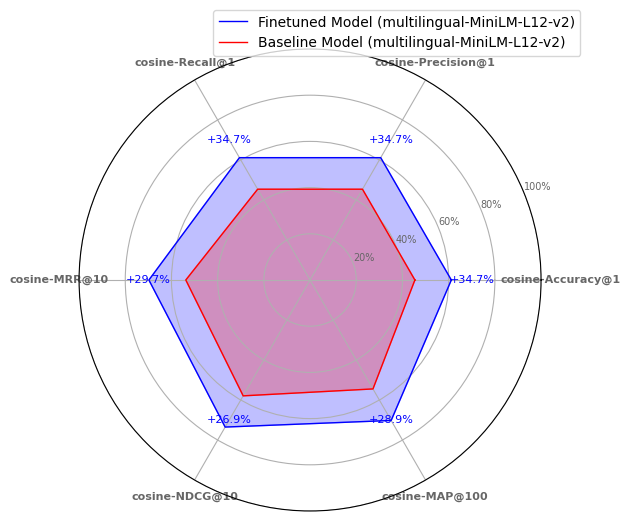

In [52]:
def plot_radar_chart(df_results_finetuned_radar, df_results_not_finetuned_radar, metrics, label_1='Finetuned Model (multilingual-MiniLM-L12-v2)', label_2='Baseline Model (multilingual-MiniLM-L12-v2)'):

    GRAY = "#666666"

    # Compute mean values
    finetuned_means = df_results_finetuned_radar.mean().values
    baseline_means = df_results_not_finetuned_radar.mean().values

    # Compute improvement
    improvement = finetuned_means - baseline_means
    percent_improvement = 100 * improvement / (baseline_means + 1e-8)  # avoid divide-by-zero

    _, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Draw the outlines and labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, color=GRAY, size=8, weight='bold', rotation=45)

    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"], color=GRAY, size=7)
    ax.set_ylim(0, 1.0)

    # Plot data
    ax.plot(angles, df_results_finetuned_radar.mean().values.tolist() + [df_results_finetuned_radar.mean().values[0]], linewidth=1, linestyle='solid', label=label_1, color='blue')
    ax.fill(angles, df_results_finetuned_radar.mean().values.tolist() + [df_results_finetuned_radar.mean().values[0]], color='blue', alpha=0.25)

    # Plot data for not finetuned model
    ax.plot(angles, df_results_not_finetuned_radar.mean().values.tolist() + [df_results_not_finetuned_radar.mean().values[0]], linewidth=1, linestyle='solid', label=label_2, color='red')
    ax.fill(angles, df_results_not_finetuned_radar.mean().values.tolist() + [df_results_not_finetuned_radar.mean().values[0]], color='red', alpha=0.25)

    # Annotate improvement
    for i, angle in enumerate(angles[:-1]):
        label = f"+{percent_improvement[i]:.1f}%" if percent_improvement[i] >= 0 else f"{percent_improvement[i]:.1f}%"
        ax.text(angle, .7, label, size=8, color='blue' if percent_improvement[i] >= 0 else 'darkred', ha='center', va='center')

    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()

plot_radar_chart(df_results_finetuned_radar, df_results_not_finetuned_radar, metrics)

# Temperature 0.1/0.7

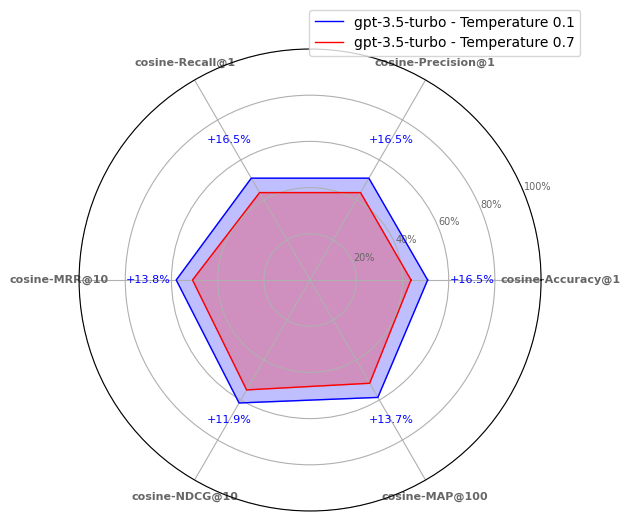

In [53]:
df_results_temperature_01 = pd.read_csv("results/Information-Retrieval_evaluation_paraphrase-multilingual-MiniLM-L12-v2_temperature_01_results.csv")
df_results_temperature_01 = df_results_temperature_01.drop(columns=["epoch", "steps"])

df_results_temperature_07 = pd.read_csv("results/Information-Retrieval_evaluation_paraphrase-multilingual-MiniLM-L12-v2_temperature_07_results.csv")
df_results_temperature_07 = df_results_temperature_07.drop(columns=["epoch", "steps"])

df_results_temperature_01_radar = df_results_temperature_01[metrics]
df_results_temperature_07_radar = df_results_temperature_07[metrics]

plot_radar_chart(df_results_temperature_01_radar, df_results_temperature_07_radar, metrics, label_1='gpt-3.5-turbo - Temperature 0.1', label_2='gpt-3.5-turbo - Temperature 0.7')